<img align="left" src="https://github.com/GarethSequeira/Customer-Churn-Model/blob/main/CustomerChurnModel/Images/CustomerChurnRect.png?raw=true" width="100%">

<br><br>

# Customer Churn Model
### Classification of Bank Customers based on Previous Banking Activities. <br>Predicting if they will Leave the Bank or Not.


In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading Dataset

df = pd.read_csv('CustomerChurnData.csv')

<br><br>

## Exploratory Data Analysis

In [3]:
# Dataset Rows and Columns

df.shape

(10000, 14)

In [4]:
# Dataset Column Headings

df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
# Dataset Column Datatype

df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# First 5 Records of the Dataset

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Last 5 Records of the Dataset

df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


<br><br>

## Data Visualization

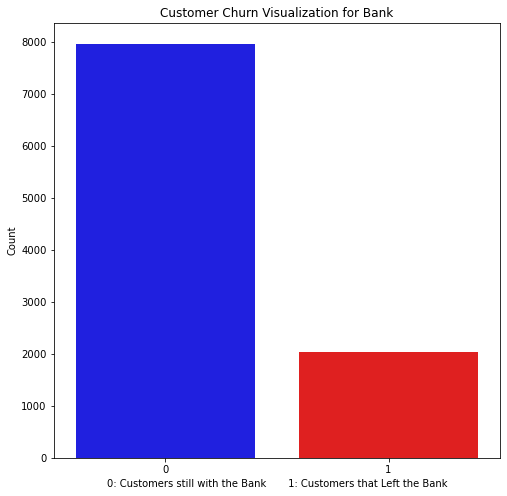

In [8]:
# Visualizing count of Exited Customers in the Dataset

plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=df, palette=("blue", "red"))
plt.xlabel('0: Customers still with the Bank       1: Customers that Left the Bank')
plt.ylabel('Count')
plt.title('Customer Churn Visualization for Bank')
plt.show()

In [9]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [10]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<br><br>

## Feature Engineering

Converting categorical features into numerical features using get_dummies()

In [11]:
# Converting Geography and Gender column

geography = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [12]:
# Appending columns to Original Dataframe

df = pd.concat([df, geography, gender], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [13]:
df.drop(['Geography', 'Gender'], axis=1, inplace=True)

<br><br>

## Data Preprocessing

• Split dataset into independent features(X) and labels(Y).

• Split dataset further into train and test sets.

• Apply feature scaling to train and test sets of independent features.

In [14]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [15]:
# Splitting the dataset into train and test sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8000, 11), X_test size: (2000, 11)


In [16]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<br><br>

## Building Artificial Neural Network

In [17]:
# Initialising the ANN

classifier = Sequential()

In [18]:
# Adding Input layer
# Adding First Hidden Layer

classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [19]:
# Adding Second Hidden Layer

classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [20]:
# Output Layer

classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [21]:
# Compiling ANN

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Fitting the ANN to the Training set

model_history = classifier.fit(X_train, y_train, batch_size=10, validation_split=0.33, epochs=100)

Epoch 1/100
536/536 [==============================] - 7s 8ms/step - loss: 0.6334 - accuracy: 0.6739 - val_loss: 0.4765 - val_accuracy: 0.7952
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4708 - accuracy: 0.8003 - val_loss: 0.4534 - val_accuracy: 0.8005
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4473 - accuracy: 0.7994 - val_loss: 0.4439 - val_accuracy: 0.8012
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4424 - accuracy: 0.8037 - val_loss: 0.4382 - val_accuracy: 0.8035
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4285 - accuracy: 0.8107 - val_loss: 0.4325 - val_accuracy: 0.8058
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4322 - accuracy: 0.8045 - val_loss: 0.4283 - val_accuracy: 0.8118
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4373 - accuracy: 0.8056 - val_loss: 0.4234 - val_accuracy: 0.8145

Epoch 58/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3201 - accuracy: 0.8650 - val_loss: 0.3559 - val_accuracy: 0.8561
Epoch 59/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3312 - accuracy: 0.8649 - val_loss: 0.3572 - val_accuracy: 0.8546
Epoch 60/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3310 - accuracy: 0.8579 - val_loss: 0.3573 - val_accuracy: 0.8535
Epoch 61/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3313 - accuracy: 0.8599 - val_loss: 0.3576 - val_accuracy: 0.8557
Epoch 62/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3287 - accuracy: 0.8609 - val_loss: 0.3557 - val_accuracy: 0.8561
Epoch 63/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3358 - accuracy: 0.8639 - val_loss: 0.3572 - val_accuracy: 0.8535
Epoch 64/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3212 - accuracy: 0.8726 - val_loss: 0.3567 - val_accuracy:

In [23]:
# List Historical Values

model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

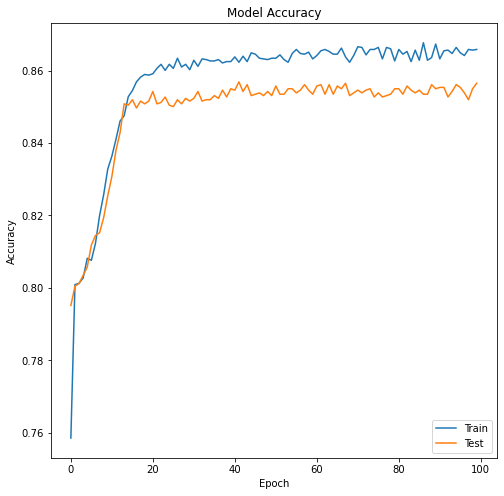

In [24]:
# Summarize for Accuracy

plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

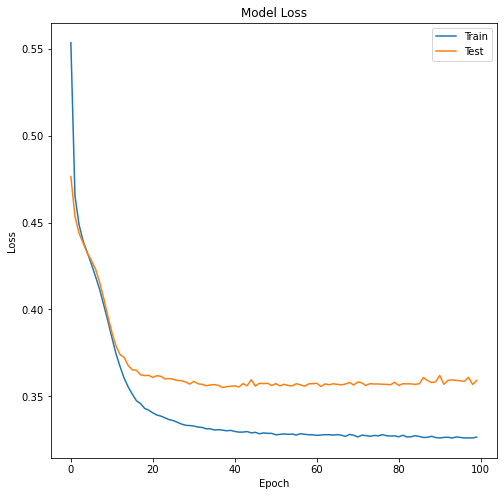

In [25]:
# Summarize for Loss

plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

<br><br>

## Model Evaluation

In [26]:
# Predict Test Set Results

y_pred = classifier.predict(X_test)

In [27]:
y_pred

array([[0.31609908],
       [0.36842299],
       [0.15531972],
       ...,
       [0.21486878],
       [0.09119907],
       [0.18156832]], dtype=float32)

In [28]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [29]:
# Create Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1490,  105],
       [ 176,  229]], dtype=int64)

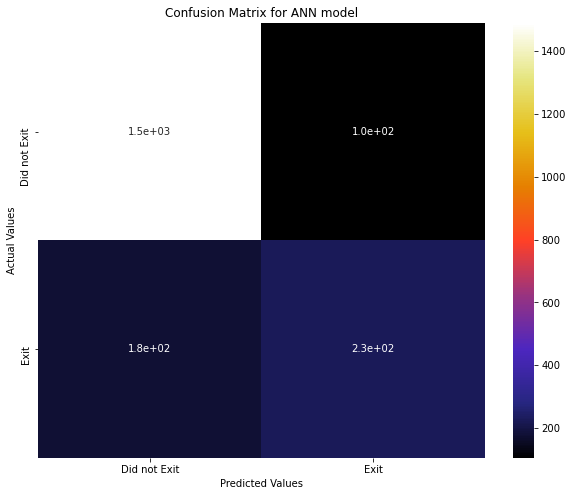

In [30]:
# Plot Confusion Matrix

plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='CMRmap', annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [31]:
# Calculate Accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('Accuracy for ANN model is: {}%'.format(score*100))

Accuracy for ANN model is: 85.95%


<br><br>

## Model Summary and Predictions

In [32]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape as sample_value has only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = sc.transform(sample_value)

  return classifier.predict(sample_value)

In [33]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.

sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High chance of customer exit!')
else:
  print('Prediction: Low chance of customer exit!')

Prediction: Low chance of customer exit!


In [35]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.

sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High chance of customer exit!')
else:
  print('Prediction: Low chance of customer exit!')

Prediction: High chance of customer exit!


___